In [4]:
import numpy as np
from pandas import DataFrame
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal as mvn

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/home/joshuacp/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


(-4, 4)

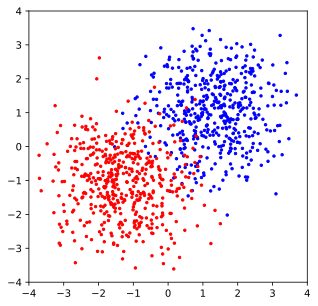

In [5]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, 
                  n_features=2, center_box=(-5.0, 5.0), random_state=3)

# normalize to center the plot
X = X - X.mean(axis=0)

plt.figure(figsize=(5,5))
plt.scatter(X[y==0, 0], X[y==0, 1], s=6, color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], s=6, color='red')
plt.xlim([-4,4])
plt.ylim([-4,4])
# plt.axis('square')

# # scatter plot, dots colored by class value
# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# colors = {0:'red', 1:'blue', 2:'green'}
# fig, ax = pyplot.subplots()
# grouped = df.groupby('label')

# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()

Epoch 1/1
200/200 [==============================] - 1s 5ms/step - loss: 0.4963 - acc: 0.9500
Epoch 1/1
200/200 [==============================] - 1s 5ms/step - loss: 0.5497 - acc: 0.7550


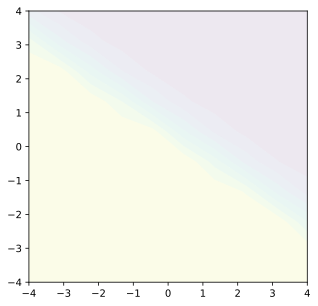

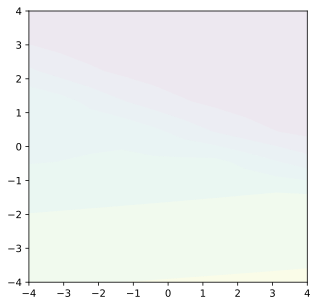

In [48]:
np.random.seed(3)
cov = 2

X = []
y_true = []
y_probs = []

n = 100

for i in range(n):
    x_c1 = mvn.rvs(mean=[-1, -1], cov=cov)
    x_c2 = mvn.rvs(mean=[1, 1], cov=cov)
    
    X.append(x_c1)
    y_true.append(0)
    
    p_x_c1_gc1 = mvn.pdf(x_c1, mean=[-1, -1], cov=cov)
    p_x_c1_gc2 = mvn.pdf(x_c1, mean=[1, 1], cov=cov)
    p_x_sum = p_x_c1_gc1 + p_x_c1_gc2
    y_probs.append([p_x_c1_gc1/p_x_sum, p_x_c1_gc2/p_x_sum])
    
    X.append(x_c2)
    y_true.append(1)
    
    p_x_c2_gc1 = mvn.pdf(x_c2, mean=[-1, -1], cov=cov)
    p_x_c2_gc2 = mvn.pdf(x_c2, mean=[1, 1], cov=cov)
    p_x_sum = p_x_c2_gc1 + p_x_c2_gc2
    y_probs.append([p_x_c2_gc1/p_x_sum, p_x_c2_gc2/p_x_sum])
    
X = np.array(X)
y_true = np.array(y_true)
y_probs = np.array(y_probs)

# for i in range(20): print(y_probs[i])

# plt.figure(figsize=(5,5))
# plt.scatter(X[y_true==0, 0], X[y_true==0, 1], s=6, color='lime')
# plt.scatter(X[y_true==1, 0], X[y_true==1, 1], s=6, color='fuchsia')
# plt.xlim([-4,4])
# plt.ylim([-4,4])

def return_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

model_probs = return_model()
history = model_probs.fit(X, y_probs,
                          batch_size=1,
                          epochs=1,
                          verbose=1)

model_gt = return_model()
history = model_gt.fit(X, keras.utils.to_categorical(y_true, 2),
                       batch_size=1,
                       epochs=1,
                       verbose=1)

def plotModelOut(x, y, model):
    '''
    x,y: 2D MeshGrid input
    model: Keras Model API Object
    '''
    grid = np.stack((x,y))
    grid = grid.T.reshape(-1,2)
    outs = model.predict(grid)
    y1 = outs.T[0].reshape(x.shape[0],x.shape[0])
    plt.contourf(x, y, y1, alpha=0.1)
    #plt.show()

plt.figure(figsize=(5,5))
a = np.linspace(-4, 4, 10)
xx, yy = np.meshgrid(a, a)
plotModelOut(xx, yy, model_probs)
plt.show()

plt.figure(figsize=(5,5))
a = np.linspace(-4, 4, 10)
xx, yy = np.meshgrid(a, a)
plotModelOut(xx, yy, model_gt)
plt.show()

Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.5038 - acc: 0.9100
Epoch 1/1
400/400 [==============================] - 5s 13ms/step - loss: 0.5105 - acc: 0.7900
Epoch 1/1
400/400 [==============================] - 5s 13ms/step - loss: 0.5515 - acc: 0.8825
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.4919 - acc: 0.8025
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.6356 - acc: 0.7025
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.5325 - acc: 0.7625
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.6034 - acc: 0.7275
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.5046 - acc: 0.7950
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.5520 - acc: 0.8300
Epoch 1/1
400/400 [==============================] - 6s 15ms/step - loss: 0.5216 - acc: 0.7850
Epoch 1/1
400/400 [==============================]

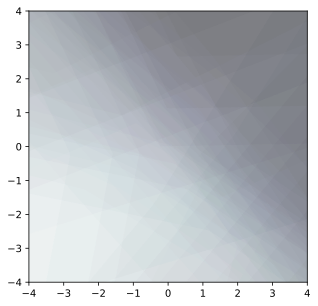

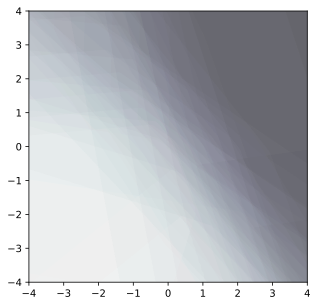

In [78]:
np.random.seed(5)

prob_results = []
gt_results = []

runs = 10
for run in range(runs):
    cov = 2

    X = []
    y_true = []
    y_probs = []

    n = 200

    for i in range(n):
        x_c1 = mvn.rvs(mean=[-1, -1], cov=cov)
        x_c2 = mvn.rvs(mean=[1, 1], cov=cov)

        X.append(x_c1)
        y_true.append(0)

        p_x_c1_gc1 = mvn.pdf(x_c1, mean=[-1, -1], cov=cov)
        p_x_c1_gc2 = mvn.pdf(x_c1, mean=[1, 1], cov=cov)
        p_x_sum = p_x_c1_gc1 + p_x_c1_gc2
        y_probs.append([p_x_c1_gc1/p_x_sum, p_x_c1_gc2/p_x_sum])

        X.append(x_c2)
        y_true.append(1)

        p_x_c2_gc1 = mvn.pdf(x_c2, mean=[-1, -1], cov=cov)
        p_x_c2_gc2 = mvn.pdf(x_c2, mean=[1, 1], cov=cov)
        p_x_sum = p_x_c2_gc1 + p_x_c2_gc2
        y_probs.append([p_x_c2_gc1/p_x_sum, p_x_c2_gc2/p_x_sum])

    X = np.array(X)
    y_true = np.array(y_true)
    y_probs = np.array(y_probs)

    # for i in range(20): print(y_probs[i])

    # plt.figure(figsize=(5,5))
    # plt.scatter(X[y_true==0, 0], X[y_true==0, 1], s=6, color='lime')
    # plt.scatter(X[y_true==1, 0], X[y_true==1, 1], s=6, color='fuchsia')
    # plt.xlim([-4,4])
    # plt.ylim([-4,4])

    def return_model():
        model = Sequential()
        model.add(Dense(2, activation='relu', input_shape=(2,)))
        model.add(Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer=SGD(),
                      metrics=['accuracy'])
        return model

    model_probs = return_model()
    history = model_probs.fit(X, y_probs,
                              batch_size=1,
                              epochs=1,
                              verbose=1)

    model_gt = return_model()
    history = model_gt.fit(X, keras.utils.to_categorical(y_true, 2),
                           batch_size=1,
                           epochs=1,
                           verbose=1)

    def plotModelOut(x, y, model):
        '''
        x,y: 2D MeshGrid input
        model: Keras Model API Object
        '''
        grid = np.stack((x,y))
        grid = grid.T.reshape(-1,2)
        outs = model.predict(grid)
        y1 = outs.T[0].reshape(x.shape[0],x.shape[0])
        #plt.contourf(x, y, y1, alpha=0.1)
        return [x, y, y1]
        #plt.show()

    #plt.figure(figsize=(5,5))
    a = np.linspace(-4, 4, 100)
    xx, yy = np.meshgrid(a, a)
    prob_results.append(plotModelOut(xx, yy, model_probs))
#     plt.show()

    #plt.figure(figsize=(5,5))
    a = np.linspace(-4, 4, 100)
    xx, yy = np.meshgrid(a, a)
    gt_results.append(plotModelOut(xx, yy, model_gt))
#     plt.show()

plt.figure(figsize=(5,5))
for prob_result in prob_results:
        plt.contourf(prob_result[0], 
                     prob_result[1],
                     prob_result[2], alpha=1/float(runs),
                     cmap=plt.cm.bone)
plt.show()

plt.figure(figsize=(5,5))
for gt_result in gt_results:
        plt.contourf(gt_result[0], 
                     gt_result[1],
                     gt_result[2], alpha=1/float(runs),
                     cmap=plt.cm.bone)
plt.show()

In [ ]:
cov = 2

X = []
y_true = []
y_probs = []

n = 200

for i in range(n):
    x_c1 = mvn.rvs(mean=[-1, -1], cov=cov)
    x_c2 = mvn.rvs(mean=[1, 1], cov=cov)

    X.append(x_c1)
    y_true.append(0)

    p_x_c1_gc1 = mvn.pdf(x_c1, mean=[-1, -1], cov=cov)
    p_x_c1_gc2 = mvn.pdf(x_c1, mean=[1, 1], cov=cov)
    p_x_sum = p_x_c1_gc1 + p_x_c1_gc2
    y_probs.append([p_x_c1_gc1/p_x_sum, p_x_c1_gc2/p_x_sum])

    X.append(x_c2)
    y_true.append(1)

    p_x_c2_gc1 = mvn.pdf(x_c2, mean=[-1, -1], cov=cov)
    p_x_c2_gc2 = mvn.pdf(x_c2, mean=[1, 1], cov=cov)
    p_x_sum = p_x_c2_gc1 + p_x_c2_gc2
    y_probs.append([p_x_c2_gc1/p_x_sum, p_x_c2_gc2/p_x_sum])

X = np.array(X)
y_true = np.array(y_true)
y_probs = np.array(y_probs)

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.axis('off')
plt.scatter(X[y_true==0, 0], X[y_true==0, 1], s=6, color='blue')
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], s=6, color='red')
plt.xlim([-4,4])
plt.ylim([-4,4])
# plt.show()

plt.subplot(1,3,2)
plt.axis('off')
# plt.figure(figsize=(5,5))
for prob_result in prob_results:
        plt.contourf(prob_result[0], 
                     prob_result[1],
                     prob_result[2], 
                     alpha=0.3,
                     cmap=plt.cm.bone)
# plt.show()

plt.subplot(1,3,3)
plt.axis('off')
# plt.figure(figsize=(5,5))
for gt_result in gt_results:
        plt.contourf(gt_result[0], 
                     gt_result[1],
                     gt_result[2], 
                     alpha=0.3,
                     cmap=plt.cm.bone)
# plt.show()